# Week05 : Regression, Logistic Regression

---
p8


# 1. Logistic Regression - Binary Classification

### Load iris dataset

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

# get X, y
X = iris.data[0:100, [2, 3]]   # select 2 features, 2:petal length and 3:petal width
y = iris.target[0:100]

print(X.shape)
print(y.shape)
print(X[:3])
print(y)
print('Class labels:', np.unique(y))

(100, 2)
(100,)
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Class labels: [0 1]


---
p9


### Splitting data into 70% training data & 30% test data

In [3]:
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # stratify(클래스별 섞는 비율은 동일하게 맞춤)


In [4]:
X_train[:3]

array([[1.5, 0.2],
       [4.5, 1.5],
       [1.5, 0.3]])

In [5]:
y_train

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0])

In [6]:
X_test[:3]

array([[4.7, 1.4],
       [3. , 1.1],
       [1.4, 0.1]])

In [7]:
y_test

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0])

In [8]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50]
Labels counts in y_train: [35 35]
Labels counts in y_test: [15 15]


---
p10


### Standardizing the features

In [11]:
from sklearn.preprocessing import StandardScaler

# standardizing X
sc = StandardScaler()
sc.fit(X_train) # train set으로부터 파악할 수 있는 정보인 표준편차/평균을 이용해 표준화
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test) # 전체 데이터를 모른다고 가정하기 때문에 test set에 대해서 표준화

print(X_train[:3])

[[1.5 0.2]
 [4.5 1.5]
 [1.5 0.3]]


In [12]:
X_train_std[:3]

array([[-0.94135169, -1.03640128],
       [ 1.12647106,  1.27518   ],
       [-0.94135169, -0.85858733]])

In [13]:
X_test_std[:3]

array([[ 1.26432591,  1.09736606],
       [ 0.09255969,  0.56392422],
       [-1.01027912, -1.21421522]])

---
p11

### Logistic regression via scikit-learn

In [20]:
from sklearn.linear_model import LogisticRegression

# training the model
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
# predicting y
y_pred = lr.predict(X_test_std)
y_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0])

In [22]:
y_test

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0])

---
p12

In [24]:
# number of misclassification
print('Misclassified test samples: %d' % (y_test != y_pred).sum())

Misclassified test samples: 0


In [25]:
# accuracy of the model
print('Training accuracy: %.2f' % lr.score(X_train_std, y_train))
print('Test accuracy: %.2f' % lr.score(X_test_std, y_test))

Training accuracy: 1.00
Test accuracy: 1.00


In [26]:
# model parameters
print('w = ', lr.coef_) # 학습이 끝난 모델의 웨이트를 보여줌
print('b = ', lr.intercept_) # 학습이 끝난 모델의 bias를 보여줌

w =  [[1.94628949 1.85398602]]
b =  [0.18557265]


---
p13

### Plotting decision regions

In [27]:
# A function for plotting decision regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

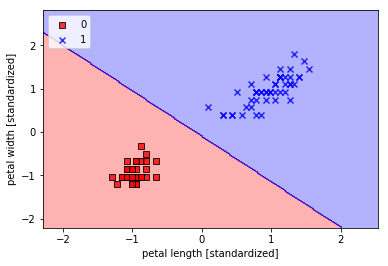

In [28]:
# decision boundary of the model 
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier=lr)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

---
p14

# 2. Logistic Regression - Multinomial Classification

###  Load iris dataset

In [30]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]   # select 2 features, 2:petal length and 3:petal width
y = iris.target[:]

print(X.shape)
print(y.shape)
print(X[:3])
print(y)
print('Class labels:', np.unique(y))

(150, 2)
(150,)
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Class labels: [0 1 2]


---
p15

### Splitting data into 70% training data & 30% test data

In [31]:
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [32]:
X_train[:3]

array([[1.4, 0.2],
       [1.7, 0.2],
       [5.3, 2.3]])

In [33]:
y_train

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [34]:
X_test[:3]

array([[5.4, 2.3],
       [1.7, 0.4],
       [1.4, 0.3]])

In [35]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [36]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


---
p16

### Standardizing the features

In [37]:
from sklearn.preprocessing import StandardScaler

# standardizing X
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [38]:
X_train_std[:3]

array([[-1.33269725, -1.30728421],
       [-1.16537974, -1.30728421],
       [ 0.84243039,  1.44587881]])

In [39]:
X_test_std[:3]

array([[ 0.89820289,  1.44587881],
       [-1.16537974, -1.04507821],
       [-1.33269725, -1.17618121]])

---
p17

### Logistic regression via scikit-learn

In [40]:
from sklearn.linear_model import LogisticRegression

# training the model
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
# predicting y
y_pred = lr.predict(X_test_std)
y_pred

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [42]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

---
p18

In [43]:
# number of misclassification
print('Misclassified test samples: %d' % (y_pred != y_test).sum())

Misclassified test samples: 3


In [45]:
# accuracy of the model
print('Training accuracy: %.2f' % lr.score(X_train_std, y_train))
print('Test accuracy: %.2f' % lr.score(X_test_std, y_test))

Training accuracy: 0.92
Test accuracy: 0.93


In [46]:
# model parameters
print('w = ', lr.coef_)
print('b = ', lr.intercept_)

w =  [[-2.17091709 -1.7637774 ]
 [ 1.15176214 -0.81795356]
 [ 1.77742576  2.1658304 ]]
b =  [-1.81650953 -0.69068362 -2.23407474]


---
p19

### Plotting decision regions

In [47]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

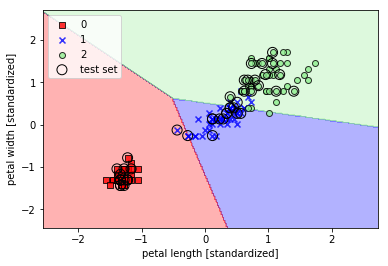

In [48]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# decision boundary of the model 
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

---
p20, 21, 22

### Tackling overfitting via regularization

In [50]:
params = []    # C for regularization
weights = []   # weights for each C
test_acc = []  # test accuracy for each C

# computing weights and accuracy for each C
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    params.append(10.**c)
    weights.append(lr.coef_[1])
    test_acc.append(lr.score(X_test_std, y_test))

/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/linea

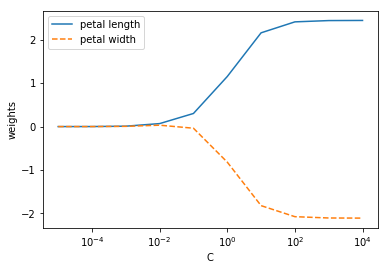

In [51]:
weights = np.array(weights)

# plotting weights each C
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], label='petal width', linestyle='--')
plt.ylabel('weights')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

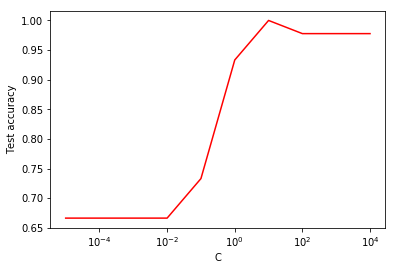

In [53]:
# plotting accuracies for each C
plt.plot(params, test_acc, color='red')
plt.ylabel('Test accuracy')
plt.xlabel('C')
plt.xscale('log')
plt.show()

---
p27

# 3. Linear Regression 

### Loading the Housing dataset into a dataframe

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("housing_data.txt", header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


---
p28

### Correlations between variables

In [56]:
# check the correlation efficients between all varibles
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


---
p29

In [57]:
# the correlation between the dependent variable and each independent variable - sorted
df.corr()[["MEDV"]].sort_values("MEDV", ascending=False)

,MEDV
MEDV,1.000000
RM,0.695360
ZN,0.360445
B,0.333461
DIS,0.249929
CHAS,0.175260
AGE,-0.376955
RAD,-0.381626
CRIM,-0.388305
NOX,-0.427321


---
p30

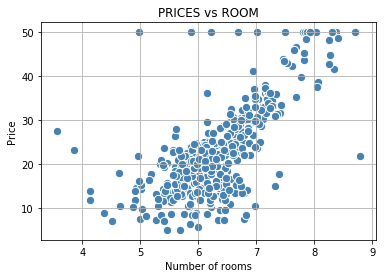

In [58]:
# plotting number of rooms(RM) vs. price(MEDV) 
plt.scatter(df["RM"].values, df["MEDV"].values, c="steelblue", edgecolor="white", s=70)
plt.title('PRICES vs ROOM') 
plt.xlabel('Number of rooms') 
plt.ylabel('Price') 
plt.grid()
plt.show()

---
p31

### Linear regression via scikit-learn

In [59]:
# get X, y
X = df[['RM']]
y = df[['MEDV']]
print(X.shape)
print(y.shape)
print(X[:5])
print(y[:5])

(506, 1)
(506, 1)
      RM
0  6.575
1  6.421
2  7.185
3  6.998
4  7.147
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


---
p32

In [67]:
from sklearn.linear_model import LinearRegression

# training the model
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
# model parameters
print('w = ', lr.coef_)
print('b = ', lr.intercept_)

w =  [[9.10210898]]
b =  [-34.67062078]


In [69]:
from sklearn.metrics import mean_squared_error

# mean squared error(MSE) of the prediction
y_pred = lr.predict(X)
print('MSE : %.3f' % mean_squared_error(y, y_pred))

MSE : 43.601


---
p33

### Plotting linear regression

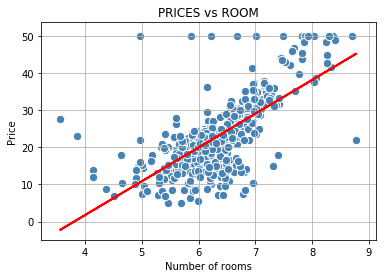

In [70]:
# plotting the model
plt.plot(X, lr.predict(X), color='red', lw=2)  

plt.scatter(df["RM"].values, df["MEDV"].values, c="steelblue", edgecolor="white", s=70)
plt.title('PRICES vs ROOM') 
plt.xlabel('Number of rooms') 
plt.ylabel('Price') 
plt.grid()
plt.show()

---
p35

# Quiz 1 : Linear Regression

## Find a model predicting 'MEDV' from 'LSTAT' using Boston Housing Dataset
- Train linear regression model with 'MEDV' as a dependent variable and 'LSTAT'(Lower status of population %) as an independent variable 
- Show the model(parameters), compute the MSE, and plot the model 

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("housing_data.txt", header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [72]:
# get X, y
X = df[['LSTAT']]
y = df[["MEDV"]]

In [73]:
# training the model
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
# model parameters
print(lr.coef_)
print(lr.intercept_)

[[-0.95004935]]
[34.55384088]


In [320]:
# mean squared error(MSE) of the prediction
None
None

MSE : 38.483


In [1]:
# plotting the model
plt.plot(X, y_pred, color='red', lw=2)

plt.scatter(df['LSTAT'].values, df['MEDV'].values, c='steelblue', edgecolor='white', s=70)
plt.title('PRICES vs ROOM') 
plt.xlabel('Lower status of population %') 
plt.ylabel('Price') 
plt.grid()
plt.show()

NameError: name 'plt' is not defined

---
p36

# Quiz 2 : Logistic Regression

## Find a model for cancer classification using Breast Cancer Wisconsin Dataset
- Train logistic regression model using all the features. The target class is 0(malignant) or 1(benign) 
- Use 70% of dataset for training, 30% for testing. Standardize the features
- Show the model(parameters), compute the accuracy, and plot the train and test accuracies for difference C values 
- Predict the class of following data:
          [[11.2, 18.5, 78.3, 451.00, 0.092, 
            0.081, 0.031, 0.042, 0.19, 0.062,
            0.33, 1.37, 2.33, 27.2, 0.0075, 
            0.016, 0.015, 0.010, 0.012, 0.0031,
            14.8, 28.6, 92.3, 632.1, 0.17, 
            0.32, 0.26, 0.21, 0.38, 0.0943]]
- Show the probability of prediction (use lr.predict_proba(X))

### Loading Breast Cancer Dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
# Converting to dataFrame and show
df = pd.DataFrame(bc.data, columns=bc.feature_names)
target = pd.Series(bc.target)
df['label'] = target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# get X, y
X = bc.data
y = bc.target

print(X.shape)
print(y.shape)
print('Class labels:', np.unique(y))
print(bc.target_names)

(569, 30)
(569,)
Class labels: [0 1]
['malignant' 'benign']


### Splitting data 

In [7]:
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


### Standardizing the features

In [8]:
from sklearn.preprocessing import StandardScaler

# standardizing X
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Logistic regression via scikit-learn

In [12]:
from sklearn.linear_model import LogisticRegression

# training the model
lr = LogisticRegression(random_state=1)
lr.fit(X_train_std, y_train)

/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
# model parameters
print("w = ", lr.coef_)
print("b = ", lr.intercept_)

w =  [[-0.44672374 -0.46518389 -0.43185636 -0.52148101 -0.03796906  0.31820662
  -0.77875096 -0.74097024 -0.16664293  0.48181618 -1.25812343 -0.21602443
  -0.84062511 -0.82618436  0.23396119  0.85679652  0.15166111 -0.2801042
   0.14461456  0.64907377 -0.86568868 -1.0037779  -0.72093035 -0.89818639
  -0.5979704  -0.12393014 -1.02245155 -0.79124985 -0.96145271 -0.41067068]]
b =  [0.35982779]


In [14]:
# accuracy of the model
print("Accuracy: ", lr.score(X_test_std, y_test))

Accuracy:  0.9649122807017544


### Plotting the training and test accuracy for various C values

In [18]:
params = []
train_acc = []
test_acc = []

# computing accuracies
for c in np.arange(-5, 5):    
    lr = LogisticRegression(C=10.**c, random_state=1, max_iter=10000)
    lr.fit(X_train_std, y_train)
    params.append(10.**c)
    train_acc.append(lr.score(X_train_std, y_train))
    test_acc.append(lr.socre(X_test_std, y_test))

# plotting accuracies

plt.plot(params, train_acc, color='green', label='train')
plt.plot(params, test_acc, color='red', label='test')

plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend(loc='lower right')
plt.xscale('log')
plt.show()

/Users/seonjin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AttributeError: 'LogisticRegression' object has no attribute 'socre'

In [19]:
new_data = [[11.2, 18.5, 78.3, 451.00, 0.092, 
            0.081, 0.031, 0.042, 0.19, 0.062,
            0.33, 1.37, 2.33, 27.2, 0.0075, 
            0.016, 0.015, 0.010, 0.012, 0.0031,
            14.8, 28.6, 92.3, 632.1, 0.17, 
            0.32, 0.26, 0.21, 0.38, 0.0943]]

# standardizing new_data
sc = StandardScaler()
sc.fit(X_train)
new_data_std = sc.transform(new_data)
new_data_std

array([[-0.81040387, -0.20004863, -0.54257553, -0.55723686, -0.35369336,
        -0.45358275, -0.7203131 , -0.18436828,  0.29230371, -0.15060502,
        -0.25696325,  0.31089387, -0.25053599, -0.27024164,  0.21836384,
        -0.52674695, -0.54547784, -0.30526892, -1.03329333, -0.26720427,
        -0.29416565,  0.44484725, -0.43381103, -0.4236021 ,  1.64341685,
         0.37871516, -0.09310786,  1.3929505 ,  1.38677111,  0.53231628]])

In [20]:
# prediction 
pred = lr.predict(new_data_std)
pred

array([1])

In [21]:
# probability for each class
prob = lr.predict_proba(new_data_std) # lr.proba()???
prob

array([[0.49933391, 0.50066609]])

In [22]:
print('Data :', new_data)

if pred[0]== 0:
    print('Prediction : Malignant')
    print('Probability : %.2f' % prob[0, 0])
if pred[0]== 1:
    print('Prediction : Benign')
    print('Probability : %.2f' % prob[0, 1])

Data : [[11.2, 18.5, 78.3, 451.0, 0.092, 0.081, 0.031, 0.042, 0.19, 0.062, 0.33, 1.37, 2.33, 27.2, 0.0075, 0.016, 0.015, 0.01, 0.012, 0.0031, 14.8, 28.6, 92.3, 632.1, 0.17, 0.32, 0.26, 0.21, 0.38, 0.0943]]
Prediction : Benign
Probability : 0.50
